# Google N-Gram Analyses

The Google NGram data can be visualized on the [website](https://books.google.com/ngrams) directly. However, it is difficult to produce graphs in a consistent format. The following notebook produces high-resolution MathPlotLib graphs based om data scraped from the Google Ngram Viewer website. 


In [85]:
%matplotlib inline
# code by https://konstantinstadler.site/posts/google_ngram_in_python, updated with support by GPT4

import re
from ast import literal_eval

import requests
import pandas as pd
import matplotlib.pyplot as plt

def plot(title=None,
         xlabel='Years', ylabel='Relative Term frequency',
         file=None,
         plot_style='fivethirtyeight',
         line_styles=None,
         line_width=2,
         **search_para):
    # configuration
    if line_styles is None:
        line_styles = ['-', '--', '-.', ':']
    case_insensitive = search_para.get('case_insensitive', False)
    if not case_insensitive:
        search_para.pop('case_insensitive', None)

    # Get data from Google NGram Viewer
    req = requests.get('http://books.google.com/ngrams/graph', params=search_para)
    res_raw = re.findall(r'<script id="ngrams-data" type="application/json">(.*?)</script>', req.text)
    res_clean = literal_eval(res_raw[0])  # It's a valid data structure at this point
    res_parsed = {content['ngram']: content['timeseries'] for content in res_clean}

    # transform into dataframe
    freq = pd.DataFrame(res_parsed)
    freq.index = pd.RangeIndex(start=search_para['year_start'], stop=search_para['year_end'] + 1)

    # rename case-insensitive column
    if case_insensitive:
        suffix = ' (All)'
        freq = freq[[col for col in freq.columns if suffix in col]]
        freq = freq.rename(columns={col: col.replace(suffix, '') for col in freq.columns if suffix in col})

    # plot
    plt.style.use(plot_style)
    fig, ax = plt.subplots(figsize=(10, 6))
    for (i, column) in enumerate(freq.columns):
        freq[column].plot(ax=ax,
                          linewidth=line_width,
                          linestyle=line_styles[i % len(line_styles)],
                          label=column)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend(loc='best')

    if file:
        plt.savefig(file, dpi=300)



## Eugen Ehrlich

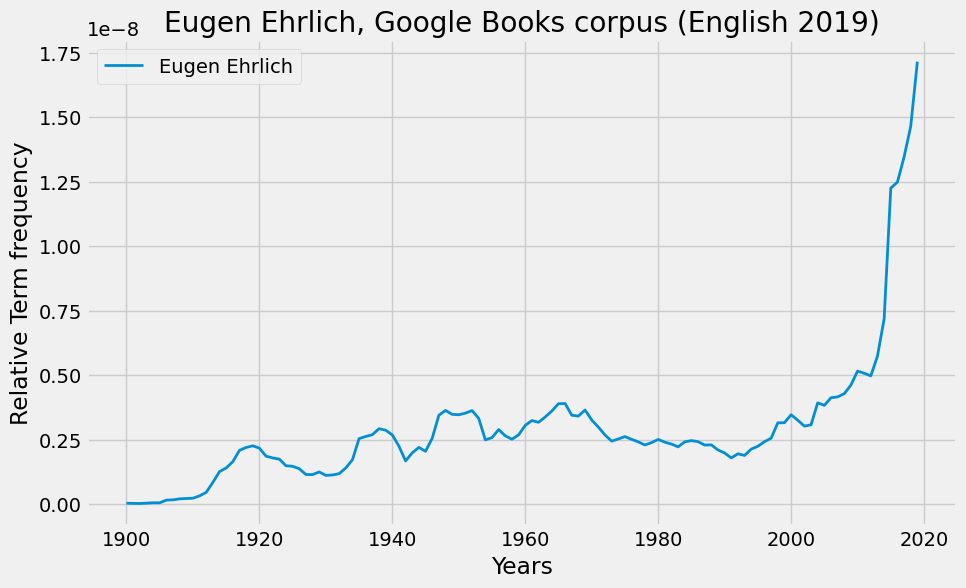

In [90]:
plot(title="Eugen Ehrlich, Google Books corpus (English 2019)",
     content='Eugen Ehrlich',
     year_start=1900, year_end=2019,
     case_insensitive=True,
     smoothing=3,
     corpus='en-2019')

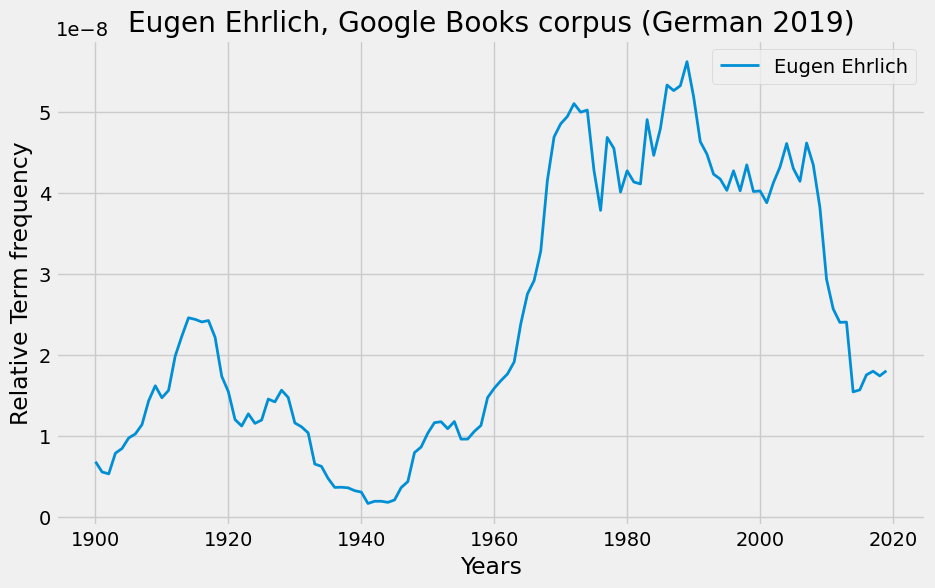

In [86]:
plot(title="Eugen Ehrlich, Google Books corpus (German 2019)",
     content='Eugen Ehrlich',
     year_start=1900, year_end=2019,
     case_insensitive=True,
     smoothing=3,
     corpus='de-2019')

## Socio-legal "classics" 

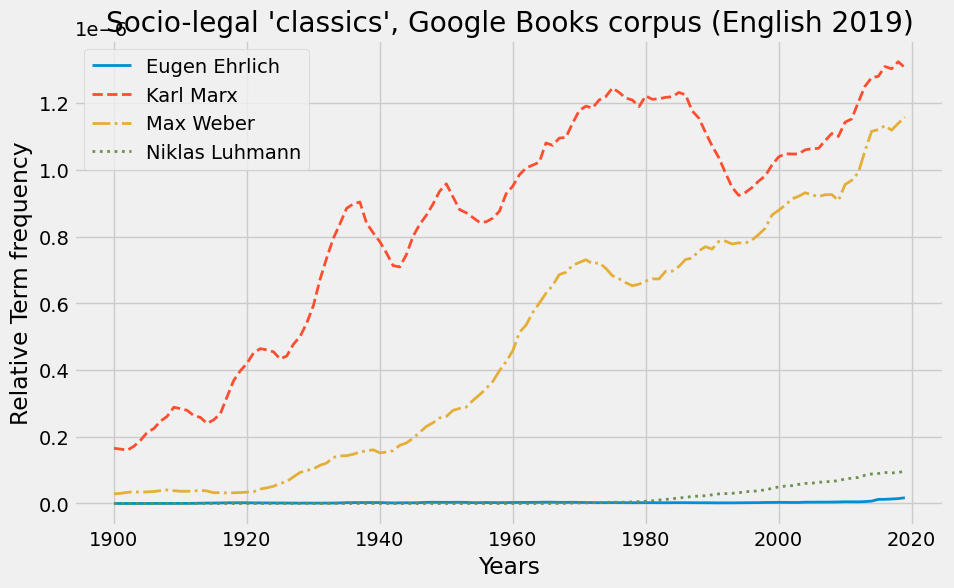

In [91]:
plot(title="Socio-legal 'classics', Google Books corpus (English 2019)",
     file="docs/05-google-ngram-marx-ehrlich-weber-luhmann-en-1900-2019.png",
     content='Eugen Ehrlich,Karl Marx,Max Weber,Niklas Luhmann',
     year_start=1900, year_end=2019,
     case_insensitive=True,
     smoothing=3,
     corpus='en-2019')

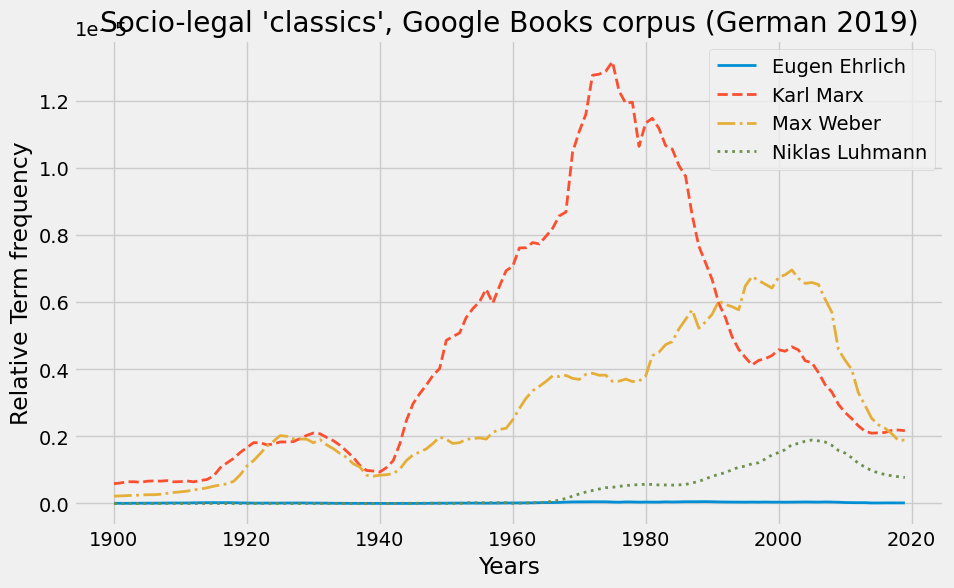

In [88]:
plot(title="Socio-legal 'classics', Google Books corpus (German 2019)",
     content='Eugen Ehrlich,Karl Marx,Max Weber,Niklas Luhmann',
     year_start=1900, year_end=2019,
     case_insensitive=True,
     smoothing=3,
     corpus='de-2019')

## Lebendes Recht/Eugen Ehrlich

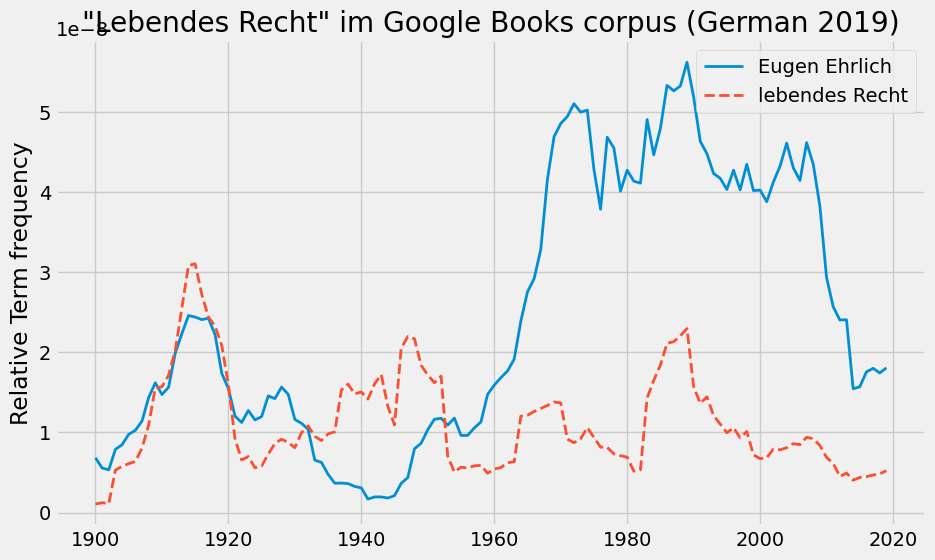

In [2]:
plot(title='"Lebendes Recht" im Google Books corpus (German 2019)',
     content='Eugen Ehrlich,lebendes Recht',
     year_start=1900, year_end=2019,
     case_insensitive=True,
     smoothing=3,
     corpus='de-2019')

## Significant correlations between terms

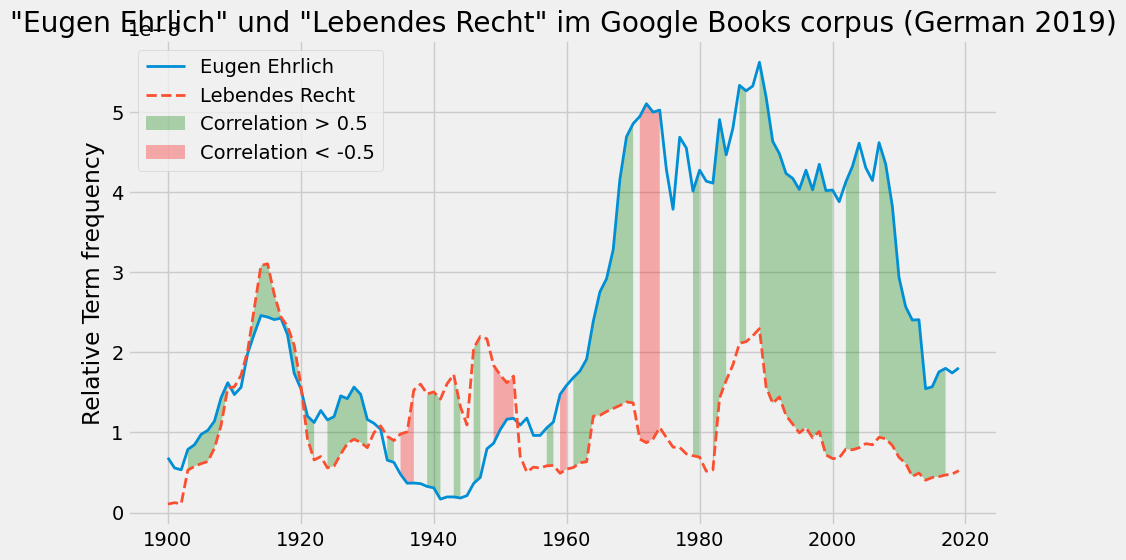

In [1]:
from lib.google_ngram import plot
plot(title='"Eugen Ehrlich" und "Lebendes Recht" im Google Books corpus (German 2019)',
    content='Eugen Ehrlich,Lebendes Recht',
    year_start=1900, year_end=2019,
    case_insensitive=True,
    smoothing=3,
    significant_correlation_value=0.5,
    corpus='de-2019')

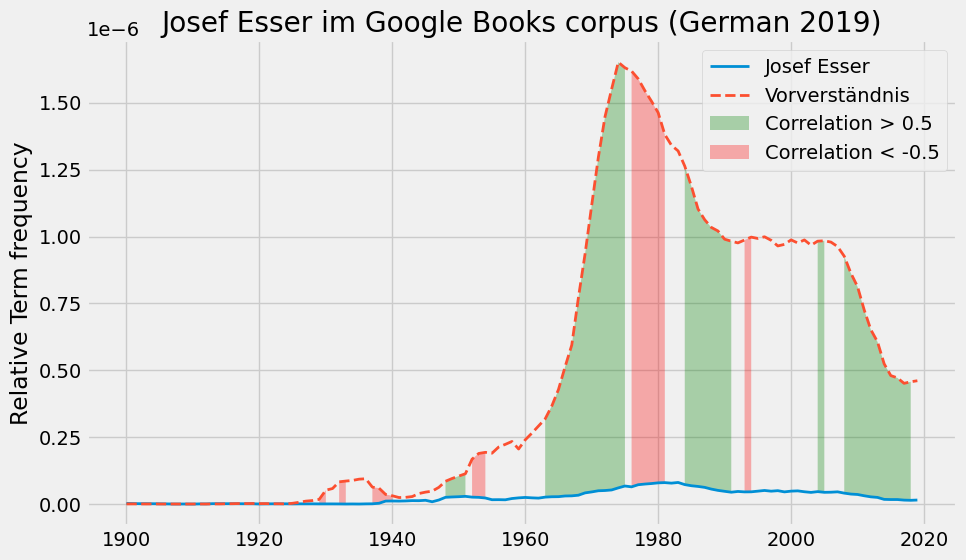

In [5]:
from lib.google_ngram import plot
plot(title='Josef Esser im Google Books-Korpus (German 2019)',
     content='Josef Esser,Vorverständnis',
     year_start=1900, year_end=2019,
     case_insensitive=False,
     smoothing=3,
     significant_correlation_value=0.5,
     corpus='de-2019')